#### Bi 410/510 (Fall 2019)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

As you work on the projects write your Python code in the cells that have a comment that says `"YOUR CODE HERE"` or `"YOUR ANSWER HERE"`.

**IMPORTANT:** Do not copy or delete these cells.

You can add additional "sandbox" cells if you wish, but make sure you don't duplicate a solution cell.

When you are finished submit this notebook through Canvas.

# <span style="color:steelblue;">Milestone 7A</span>

### <span style="color:steelblue;">Instructions</span>

The data for this exam is in the file named `finances.csv`.  This is the same file used for Milestone 6A.  You can either copy it from the directory you used for that exam or download it from the Bi 410 server.
 
Each line in this file defines one financial transaction, with the following items on each line:
* transaction date
* payee (usually a business name)
* amount
* expense category

### <span style="color:steelblue;">Imports</span>

Execute this code cell to load the libraries for this exam:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### <span style="color:steelblue;">Create the Data Frame</span>

Use Pandas to read the data and save it as a frame named `spending`.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spending = pd.read_csv('finances7A.csv')    

#### Sandbox 

You can insert code cells here to verify the frame was created successfully.  The first few rows should look like this:
```
         date  month        description  amount budget
0  2016-01-01      1    Diamond Parking    4.00    car
1  2016-01-03      1            Safeway   32.78   food
2  2016-01-07      1  Bed Bath & Beyond   15.99   home
3  2016-01-08      1       Pottery Barn   49.00   home
4  2016-01-09      1           Newman's   11.69   food
```

#### Tests 

We'll execute this code cell when we grade your exam.

In [4]:
assert len(spending) == 253
assert len(spending.columns == 5)

### <span style="color:steelblue;">Amount Spent in Each Category</span>

Use the code cell below to create a frame named `expenses` that shows the total amount spent in each budget category:
```
car      1424.10
food     3998.48
...
```

In [5]:
expenses = spending.groupby('budget').sum().drop(columns=['month']).amount
print(expenses.keys())

Index(['car', 'food', 'home'], dtype='object', name='budget')


#### Sandbox 

You can insert code cells here to verify the frame was created successfully. 

#### Tests 

In [6]:
assert len(expenses) == 3

In [7]:
assert round(expenses.car,2) == 1424.10
assert round(expenses.food,2) == 3998.48
assert round(expenses.home,2) == 2560.04

### <span style="color:steelblue;">Annual Spending</span>

Use the code cell below to create a frame named `monthly` that will show the total amount spent each month:
```
1    788.09
2    597.19
3    685.79
...
12   578.48
```

In [8]:
monthly = spending.groupby(['month']).sum().amount
print(monthly.keys())

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')


#### Sandbox 

You can insert code cells here to verify the frame was created successfully. 

#### Tests 

In [9]:
assert len(monthly) == 12

In [10]:
assert round(monthly.loc[1],2) == 788.09
assert round(monthly.loc[12],2) == 578.48

### <span style="color:steelblue;">Pivot Table</span>

Use the code cell below to create a frame named `table` that shows the monthly expenses in each budget category:
```
budget     car    food    home
month                         
1        82.29  344.77  361.03
2        79.01  392.05  126.13
3       147.22  336.54  202.03
...
12      152.50  246.70  179.28
```

In [11]:
table = pd.pivot_table(spending, index=['month'], columns='budget', values='amount', aggfunc=np.sum)
table

budget,car,food,home
month,,,
1,82.29,344.77,361.03
2,79.01,392.05,126.13
3,147.22,336.54,202.03
4,79.93,404.86,154.81
5,69.91,339.25,102.51
6,133.23,448.00,248.72
7,128.29,295.00,224.73
8,126.93,234.72,167.40
9,228.05,382.82,299.90


#### Sandbox 

You can insert code cells here to verify the frame was created successfully. 

#### Tests 

In [74]:
assert len(table) == 12 and len(table.columns) == 3

In [75]:
assert round(table.loc[1].car,2) == 82.29
assert round(table.loc[12].home,2) == 179.28

### <span style="color:steelblue;">Plot Spending by Category</span>

Use the code cell below to produce a bar chart that shows total spending in each category.  You can use either `pandas` or `pyplot` to produce your chart, but the data needs to come from the `spending` data frame.  The plot should have a title and $x$ and $y$ labels, but all other formatting is optional.

<img src="https://pages.uoregon.edu/conery/Bi410/spending_categories_pandas.png">

<function matplotlib.pyplot.show(*args, **kw)>

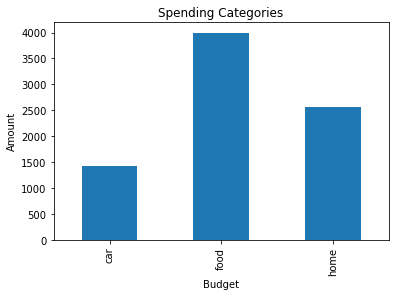

In [12]:
spending.groupby('budget')['amount'].sum().plot.bar(x=['budget'], y=['amount'])
plt.title('Spending Categories')
plt.xlabel('Budget')
plt.ylabel('Amount')
plt.show

### <span style="color:steelblue;">Plot Annual Spending</span>

Fill in the code cell below to generate a graph that shows the total spending over the year, plotting one point per month.  The $x$-axis should show the months, the $y$-axis should be the amount spent in each month.

Your plot should look something like this.  You can use either pandas or pyplot to produce your chart, but the data needs to come from the spending data frame.  The plot should have a title and $x$ and $y$ labels, but all other formatting is optional.

<img src="https://pages.uoregon.edu/conery/Bi410/annual_spending_pandas.png">

<function matplotlib.pyplot.show(*args, **kw)>

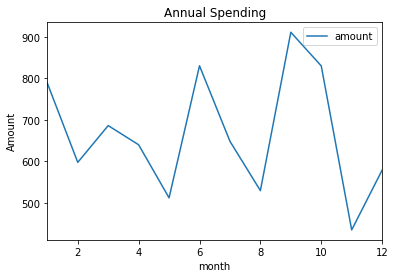

In [77]:
spending.groupby(['month']).sum().plot.line()
plt.title('Annual Spending')
plt.xlabel("month")
plt.ylabel("Amount")
plt.show